In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

## Read the dataset and understand the features and target variable

In [2]:
col = ['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating_Risk','Class']
bank = pd.read_csv('Qualitative_Bankruptcy.data.txt',header=None,names=col)

In [3]:
bank.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
bank.tail()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B
249,P,N,N,N,A,A,B


#### Check for DataTypes

In [5]:
bank.info()
#All the feature datatypes are of object(string), as noticed in head().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial_Risk        250 non-null    object
 1   Management_Risk        250 non-null    object
 2   Financial_Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating_Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
print(f'No.of Observations in the dataset : {bank.shape[0]}')
print(f'No.of Features in the dataset : {bank.shape[1]}')

No.of Observations in the dataset : 250
No.of Features in the dataset : 7


#### Check for missing data

In [7]:
bank.isna().sum()
#As we can see there are no missing values

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
Class                    0
dtype: int64

#### Missing data visualizations 

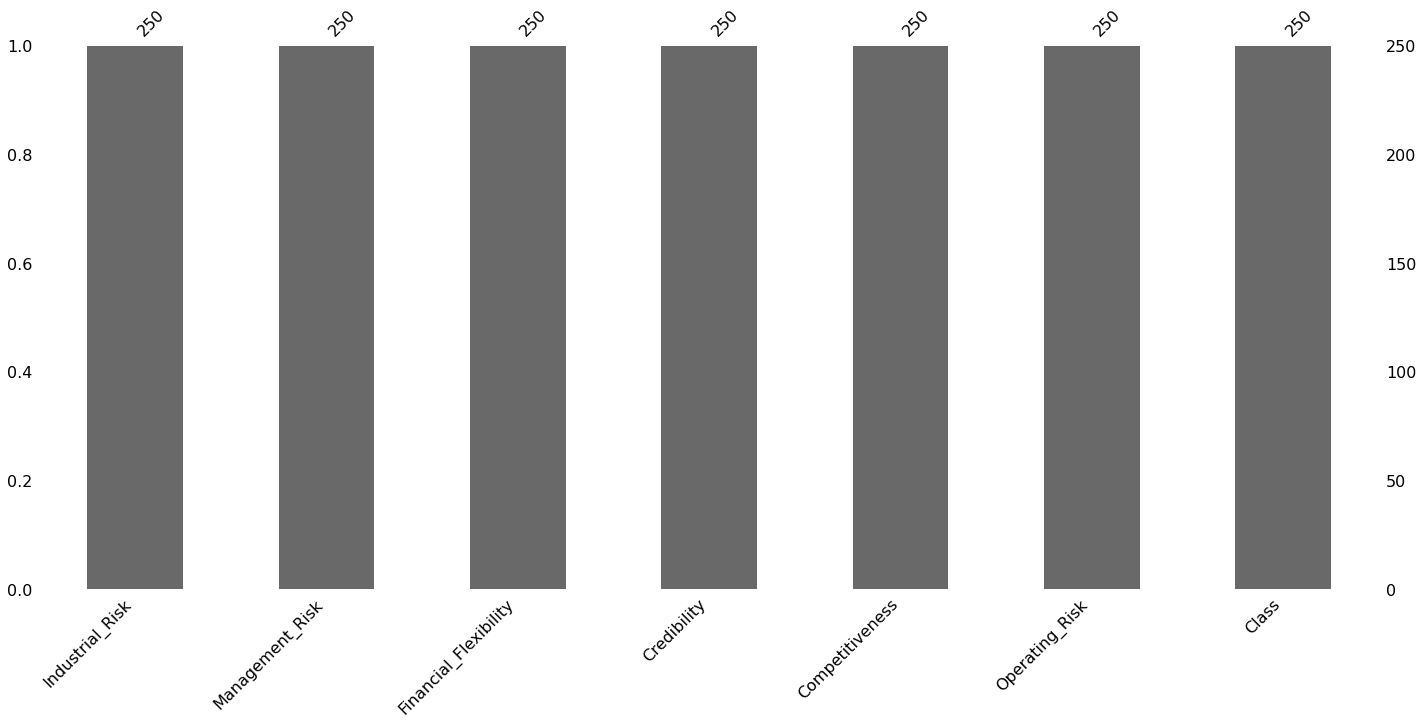

In [8]:
msno.bar(bank);

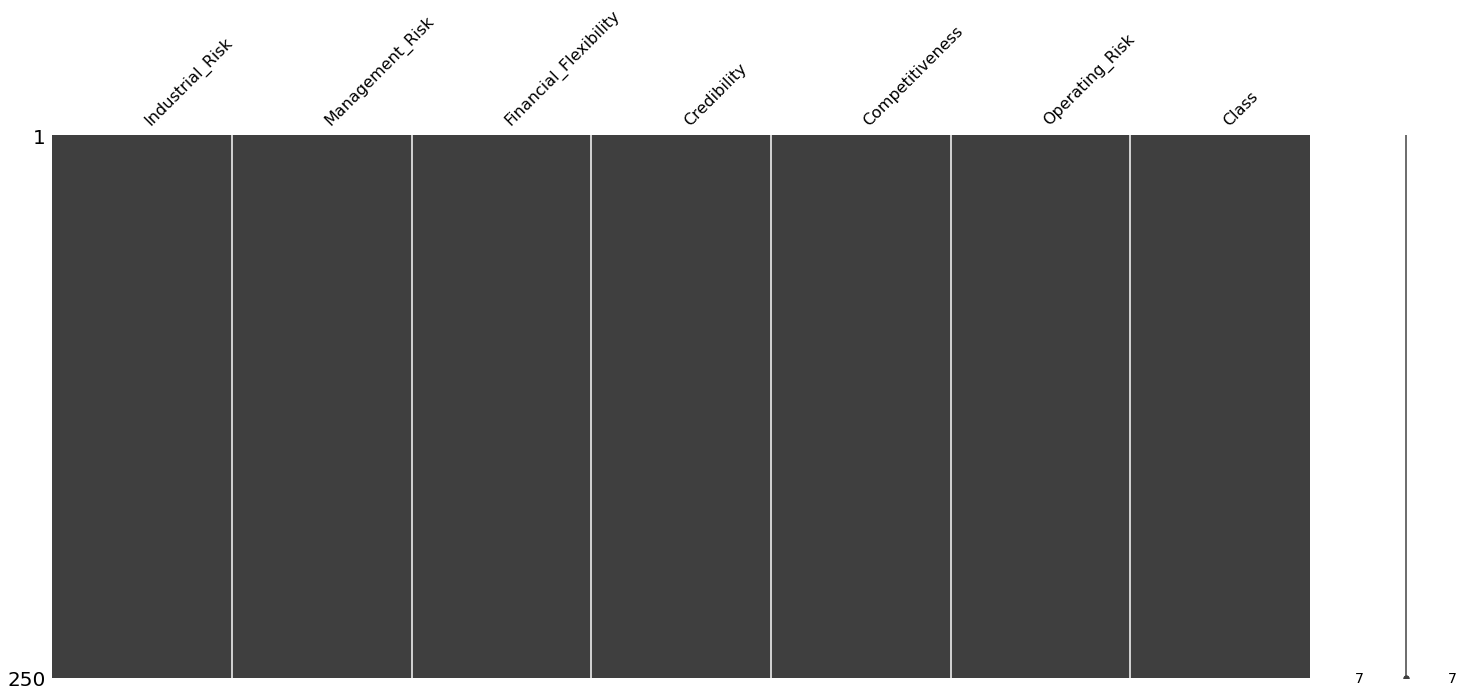

In [9]:
msno.matrix(bank);

As seen in before, there are no missing values in the dataset

#### Descriptive Analysis

In [10]:
bank.describe(include='all').T

,count,unique,top,freq
Industrial_Risk,250,3,N,89
Management_Risk,250,3,N,119
Financial_Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating_Risk,250,3,N,114
Class,250,2,NB,143


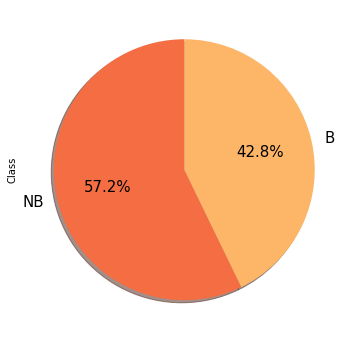

In [11]:
plt.figure(figsize=(12,6))
count = bank.Class.value_counts()#.plot(kind = 'bar')
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]
count.plot(kind='pie',startangle=90,autopct='%.1f%%',shadow=True, labels=count.index,colors=colors,fontsize=15);

Target column Class has almost equal number of labels(B & NB).Less chances that the model would bais towards NB class.

## Encode independent features

In [12]:
# le =  LabelEncoder()
# le.fit_transform(bank.iloc[:,:-1])
bank.iloc[:,:-1].apply(LabelEncoder().fit_transform)[:5]

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


The Problem with LabelEncoder is,it assign's a unique number to different label's based on the Alphabetical order.<br>
Example : **Good, Bad, Worst -> 1, 0, 2 (Priority based on Alphabetical order)**<br>
But, in real case the order should be **Good, Bad, Worst -> 0, 1, 2**

In [13]:
labels = {'N':0,'A':1,'P':2}
bank.Industrial_Risk = bank.Industrial_Risk.map(labels)
bank.Management_Risk = bank.Management_Risk.map(labels)
bank.Financial_Flexibility = bank.Financial_Flexibility.map(labels)
bank.Credibility = bank.Credibility.map(labels)
bank.Competitiveness = bank.Competitiveness.map(labels)
bank.Operating_Risk = bank.Operating_Risk.map(labels)

In [14]:
bank.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,2,2,1,1,1,2,NB
1,0,0,1,1,1,0,NB
2,1,1,1,1,1,1,NB
3,2,2,2,2,2,2,NB
4,0,0,2,2,2,0,NB


## Separate the dependant variable from the rest of the train data 

In [15]:
X = bank.iloc[:,:-1]
y = bank.iloc[:,-1]
X.shape,y.shape

((250, 6), (250,))

In [16]:
X.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,2,2,1,1,1,2
1,0,0,1,1,1,0
2,1,1,1,1,1,1
3,2,2,2,2,2,2
4,0,0,2,2,2,0


## Split the dataset into training and test data 

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=14,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((200, 6), (200,), (50, 6), (50,))

## Apply PCA on the independent features of train data

In [18]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

In [94]:
train_cov = np.cov(X_train.T)
print(f'Covariance Matrix : \n {train_cov}') 

Covariance Matrix : 
 [[0.71105528 0.19949749 0.11834171 0.00351759 0.18894472 0.1040201 ]
 [0.19949749 0.71065327 0.18457286 0.22924623 0.24201005 0.16592965]
 [0.11834171 0.18457286 0.65826633 0.35442211 0.50271357 0.06346734]
 [0.00351759 0.22924623 0.35442211 0.71266332 0.49628141 0.18703518]
 [0.18894472 0.24201005 0.50271357 0.49628141 0.78231156 0.15055276]
 [0.1040201  0.16592965 0.06346734 0.18703518 0.15055276 0.76693467]]


In [95]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov)
print(f'Eigen Values : \n{eigenvalues}\n')
print(f'Eigen Vectors : \n{eigenvectors}')

Eigen Values : 
[1.89696534 0.8006661  0.68699149 0.49769928 0.17518901 0.2843732 ]

Eigen Vectors : 
[[-0.21889951 -0.59369441 -0.59344655  0.37245938 -0.19033181 -0.26921917]
 [-0.35238284 -0.37610143 -0.10409246 -0.83611018  0.06676775  0.14142363]
 [-0.4553061   0.28940373 -0.17945374  0.16126382 -0.45049534  0.66916823]
 [-0.48325265  0.28767995  0.25879545 -0.10208376 -0.43034239 -0.64893479]
 [-0.56831336  0.22487281 -0.10639673  0.20305772  0.75573079 -0.05263479]
 [-0.25316496 -0.53758032  0.72559421  0.2907477   0.00679875  0.18933433]]


In [96]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(1.8969653445766612,
  array([-0.21889951, -0.59369441, -0.59344655,  0.37245938, -0.19033181,
         -0.26921917])),
 (0.8006661039518619,
  array([-0.35238284, -0.37610143, -0.10409246, -0.83611018,  0.06676775,
          0.14142363])),
 (0.6869914872156317,
  array([-0.4553061 ,  0.28940373, -0.17945374,  0.16126382, -0.45049534,
          0.66916823])),
 (0.49769928206747555,
  array([-0.48325265,  0.28767995,  0.25879545, -0.10208376, -0.43034239,
         -0.64893479])),
 (0.28437319580205106,
  array([-0.25316496, -0.53758032,  0.72559421,  0.2907477 ,  0.00679875,
          0.18933433])),
 (0.17518900849687286,
  array([-0.56831336,  0.22487281, -0.10639673,  0.20305772,  0.75573079,
         -0.05263479]))]

In [97]:
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

In [98]:
var_explained = [(i / sum(eigenvalues)) for i in train_eigvalues_sorted]
print(f'Variance Explained : \n{var_explained}\n')
cum_var_exp = np.cumsum(var_explained)
print(f'Cumulative Sum : \n{cum_var_exp}')

Variance Explained : 
[0.43689908808179695, 0.18440520891679207, 0.1582242686417919, 0.11462748283510227, 0.06549533984689061, 0.040348611677626114]

Cumulative Sum : 
[0.43689909 0.6213043  0.77952857 0.89415605 0.95965139 1.        ]


## Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 

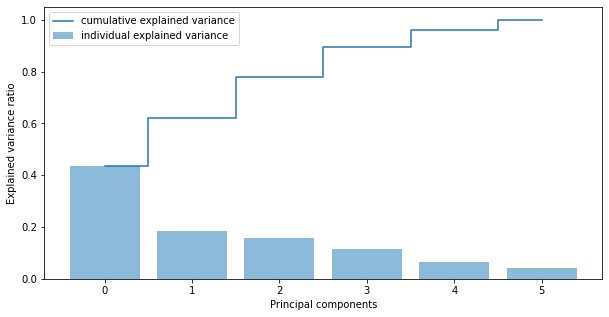

In [99]:
plt.figure(figsize=(10,5))
plt.bar(range(0,6), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,6),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

**First 5 Principal components covers 96% of the variance.**

## Transform the data using PCA ( select optimum number of PCs). 

In [100]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 1.09813189e+00, -1.60492043e+00,  2.83106906e-02,
         2.64218832e-01, -2.47591510e-01],
       [-2.05763483e+00,  6.07875407e-01, -7.44714321e-04,
         1.80650433e-01, -1.56915284e-01],
       [ 7.22316315e-01,  8.82501845e-01, -3.42381369e-01,
         1.38757528e+00, -3.54726412e-01],
       [ 1.64336798e+00, -1.72070260e-02, -1.27047901e+00,
         7.44740273e-01,  8.32646725e-01],
       [-1.83873533e+00,  1.41809965e-02, -5.94191261e-01,
        -1.91808947e-01,  1.12303887e-01]])

In [101]:
pca.explained_variance_ #Eigen Values

array([1.89696534, 0.8006661 , 0.68699149, 0.49769928, 0.2843732 ])

In [102]:
pca.components_

array([[ 0.21889951,  0.35238284,  0.4553061 ,  0.48325265,  0.56831336,
         0.25316496],
       [-0.59369441, -0.37610143,  0.28940373,  0.28767995,  0.22487281,
        -0.53758032],
       [-0.59344655, -0.10409246, -0.17945374,  0.25879545, -0.10639673,
         0.72559421],
       [-0.37245938,  0.83611018, -0.16126382,  0.10208376, -0.20305772,
        -0.2907477 ],
       [ 0.26921917, -0.14142363, -0.66916823,  0.64893479,  0.05263479,
        -0.18933433]])

## Apply KMeans algorithm on the above transformed data

In [103]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
cluster_errors = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_pca)
    prediction=model.predict(X_train_pca)
    meanDistortions.append(sum(np.min(cdist(X_train_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    cluster_errors.append( model.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":clusters, "cluster_errors": cluster_errors } )
print(clusters_df)

   num_clusters  cluster_errors
0             1      829.172387
1             2      506.373893
2             3      412.077661
3             4      356.423753
4             5      311.724037
5             6      279.535625
6             7      246.322837
7             8      224.199255
8             9      206.633997


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

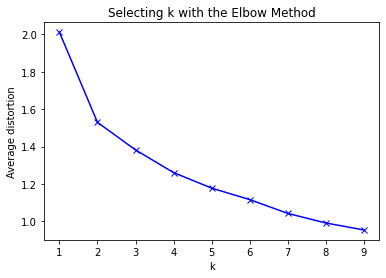

In [104]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

It seems **k = 4 is the optimal value**.Since Average distortion after 4 is very minimum.

#### KMeans with original X_train

In [105]:
knn = KMeans(n_clusters=4)
knn.fit(X_train)
pred = knn.predict(X_train)

#### KMeans with PCA transformed X_train

In [106]:
knn_pca = KMeans(n_clusters=4)
knn_pca.fit(X_train_pca)
pred_ = knn_pca.predict(X_train_pca)

In [107]:
X_train_pca = pd.DataFrame(X_train_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
X_train_pca[:2]

,PC1,PC2,PC3,PC4,PC5
0,1.098132,-1.604920,0.028311,0.264219,-0.247592
1,-2.057635,0.607875,-0.000745,0.180650,-0.156915


## Create a new column in the train data and populate it with the cluster labels

In [108]:
# with original X_train
X_train['Cluster Label'] = pred
X_train.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Cluster Label
108,2,2,1,1,1,2,3
197,0,0,0,0,0,0,2
34,0,2,1,1,2,0,0
75,2,2,1,2,2,0,0
213,1,0,0,0,0,0,2


In [109]:
# with PCA transformed X_train
X_train_pca['Cluster Label'] = pred_
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,Cluster Label
0,1.098132,-1.604920,0.028311,0.264219,-0.247592,1
1,-2.057635,0.607875,-0.000745,0.180650,-0.156915,2
2,0.722316,0.882502,-0.342381,1.387575,-0.354726,3
3,1.643368,-0.017207,-1.270479,0.744740,0.832647,3
4,-1.838735,0.014181,-0.594191,-0.191809,0.112304,0


## Transform the test data using the same PCA object that was fit on the train data

In [110]:
X_test_pca = pca.transform(X_test)
X_test_pca[:5]

array([[-1.32121723,  0.35797503,  0.98364495, -0.00801352,  0.30268518],
       [ 1.43078737,  0.63432526,  0.20375911,  0.93556375, -1.21322897],
       [ 1.32525059,  0.41500849,  0.15265421, -0.00965823,  0.51551686],
       [ 1.76936851, -0.71454246, -0.15344731, -0.93621289, -0.72270132],
       [-0.11296371,  0.22244308, -1.21469282, -0.82650611,  0.41392441]])

## Use the same kmeans object, assign cluster labels to the test data and store it as a feature

In [111]:
# with original X_train
test_pred = knn.predict(X_test)

In [112]:
# with PCA transformed X_train
test_pred_pca = knn_pca.predict(X_test_pca)
X_test_pca = pd.DataFrame(X_test_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
X_test_pca[:2]

,PC1,PC2,PC3,PC4,PC5
0,-1.321217,0.357975,0.983645,-0.008014,0.302685
1,1.430787,0.634325,0.203759,0.935564,-1.213229


In [113]:
# with original X_train
X_test['Cluster Label'] = test_pred
X_test.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Cluster Label
148,0,0,0,1,0,1,1
36,0,2,2,1,2,1,0
19,1,1,1,2,2,1,0
72,2,1,2,1,2,2,3
135,2,0,1,1,1,0,0


In [114]:
# with PCA transformed X_train
X_test_pca['Cluster Label'] = test_pred_pca
X_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,Cluster Label
0,-1.321217,0.357975,0.983645,-0.008014,0.302685,2
1,1.430787,0.634325,0.203759,0.935564,-1.213229,3
2,1.325251,0.415008,0.152654,-0.009658,0.515517,3
3,1.769369,-0.714542,-0.153447,-0.936213,-0.722701,1
4,-0.112964,0.222443,-1.214693,-0.826506,0.413924,0


## Apply SVC model on train dataset and predict target for test dataset.

In [115]:
# SVM on original data
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [116]:
predic = svc.predict(X_test)

In [117]:
# SVM on PCA transformed data
svc1 = SVC()
svc1.fit(X_train_pca,y_train)

SVC()

In [118]:
predic_pca = svc1.predict(X_test_pca)

## Check accuracy and confusion matrix

In [119]:
# SVM accuracy on original data
print(f'Training Score : {svc.score(X_train,y_train)}')
print(f'Testing Score : {accuracy_score(y_test,predic)}')

Training Score : 1.0
Testing Score : 1.0


The model achieved 100% in both training and testing

In [120]:
# SVM accuracy on PCA transformed data
print(f'Training Score : {svc1.score(X_train_pca,y_train)}')
print(f'Testing Score : {accuracy_score(y_test,predic_pca)}')

Training Score : 0.99
Testing Score : 0.98


The model achieved 99% accuracy on both PCA transformed training data and 98% on testing data.

In [121]:
# confusion_matrix on original data
pd.DataFrame(confusion_matrix(y_test,predic),columns=bank.Class.unique(),index=bank.Class.unique())

,NB,B
NB,21,0
B,0,29


In [122]:
# confusion_matrix on PCA transformed data
pd.DataFrame(confusion_matrix(y_test,predic_pca),columns=bank.Class.unique(),index=bank.Class.unique())

,NB,B
NB,21,0
B,1,28


As we know, Support Vector Machine is of the powerful algorithms which almost performs equalent to neural networks.
SVM outperformed with the small dataset we used even without tuning hyperparameters.